# Imports

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
import statsmodels.api as sm
import sklearn
from sklearn import svm, linear_model
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, SGDClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures

# Data Exploration

In [2]:
# Get Data
customers = pd.read_csv("csv/Customers.csv")
orders = pd.read_csv("csv/Orders.csv")

## Customers

In [3]:
customers

,CustomerID,Customer,Market,CustomerComplaints
0,1000,Didier Evra,Africa,7
1,1001,Jean Tedeaux,Canada,1
2,1002,HBSA LLC,Canada,4
3,1003,Bikes and More SE,EU,0
4,1004,Patrick Johnson,US,7
5,1005,Steel & Aluminium LLC,US,0
6,1006,Joseph Omer,EMEA,5
7,1007,Aerospace SE,EU,5
8,1008,Chow Ming,APAC,0
9,1009,Robert Sherbatsky,Canada,3


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
CustomerID            32 non-null int64
Customer              32 non-null object
Market                32 non-null object
CustomerComplaints    32 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.1+ KB


In [5]:
customers["Market"].value_counts()

US        6
EU        6
EMEA      4
Canada    4
Africa    4
APAC      4
LATAM     4
Name: Market, dtype: int64

In [6]:
customers["CustomerComplaints"].value_counts()

0    11
7     4
3     4
4     3
2     3
1     3
8     2
5     2
Name: CustomerComplaints, dtype: int64

In [7]:
customers["CustomerComplaints"].describe()

count    32.000000
mean      2.718750
std       2.761888
min       0.000000
25%       0.000000
50%       2.000000
75%       4.250000
max       8.000000
Name: CustomerComplaints, dtype: float64

## Orders 

In [8]:
orders

,OrderID,InvoiceDate,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,FirstCustomerOrder,CashInDate
0,O-100,2011-01-03,1024,276.1,Same Day,Corporate,Office Supplies,30,5%,Yes,Yes,2011-02-18
1,O-101,2011-01-03,1024,35.88,Same Day,Corporate,Office Supplies,30,5%,Yes,No,2011-02-18
2,O-102,2011-01-05,1006,66.12,Second Class,Consumer,Office Supplies,30,3%,Yes,Yes,2011-02-06
3,O-104,2011-01-06,1023,408.3,Standard Class,Consumer,Office Supplies,30,5%,No,Yes,2011-02-17
4,O-105,2011-01-06,1009,314.22,Standard Class,Consumer,Technology,45,3%,Yes,Yes,2011-02-10
...,...,...,...,...,...,...,...,...,...,...,...,...
37637,O-48951,2014/30/11,1029,50.09,Standard Class,Corporate,Office Supplies,14,3%,No,No,2014-12-31
37638,O-48953,2014/30/11,1010,21.12,Same Day,Consumer,Office Supplies,14,5%,Yes,No,2014-12-31
37639,O-48960,2014-11-30,1031,33.57,First Class,Consumer,Office Supplies,14,5%,Yes,No,2014-12-16
37640,O-48972,2014-11-30,1031,20.72,Second Class,Consumer,Office Supplies,30,3%,Yes,No,2014-12-15


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37642 entries, 0 to 37641
Data columns (total 12 columns):
OrderID                  37642 non-null object
InvoiceDate              37642 non-null object
CustomerID               37642 non-null int64
OrderVolume              37633 non-null object
ShipMode                 37642 non-null object
Segment                  37642 non-null object
Category                 37642 non-null object
PaymentTerm              37642 non-null int64
Discount                 37626 non-null object
ExistingPurchaseOrder    37642 non-null object
FirstCustomerOrder       37642 non-null object
CashInDate               37642 non-null object
dtypes: int64(2), object(10)
memory usage: 3.4+ MB


In [10]:
orders.describe()

,CustomerID,PaymentTerm
count,37642.000000,37642.000000
mean,1016.965969,29.547314
std,8.935228,12.673499
min,1000.000000,14.000000
25%,1010.000000,14.000000
50%,1016.000000,30.000000
75%,1025.000000,45.000000
max,1031.000000,45.000000


In [11]:
orders["CustomerID"].value_counts()

1008    2126
1015    2089
1013    1968
1010    1964
1029    1961
1024    1958
1028    1937
1004    1911
1020    1876
1031    1864
1012    1842
1025    1747
1018     965
1006     963
1005     926
1014     924
1016     917
1007     912
1027     905
1030     897
1000     880
1003     871
1011     861
1019     847
1026     841
1023     825
1022     797
1021     789
1009      73
1002      71
1001      68
1017      67
Name: CustomerID, dtype: int64

In [12]:
orders["ShipMode"].value_counts()

Standard Class    22532
Second Class       7571
First Class        5554
Same Day           1985
Name: ShipMode, dtype: int64

In [13]:
orders["Segment"].value_counts()

Consumer     19449
Corporate    18193
Name: Segment, dtype: int64

In [14]:
orders["Category"].value_counts()

Office Supplies    22931
Technology          7535
Furniture           7176
Name: Category, dtype: int64

In [15]:
orders["PaymentTerm"].value_counts()

14    12720
30    12490
45    12432
Name: PaymentTerm, dtype: int64

In [16]:
orders["Discount"].value_counts()

5%    18748
3%     9440
0%     9438
Name: Discount, dtype: int64

In [17]:
orders["ExistingPurchaseOrder"].value_counts()

Yes    33022
No      4620
Name: ExistingPurchaseOrder, dtype: int64

In [18]:
orders["FirstCustomerOrder"].value_counts()

No     37617
Yes       25
Name: FirstCustomerOrder, dtype: int64

# Task 1: Predict the number of days between invoice date and cash in date for each invoice

# Data Preparation & New Features

### Drop FirstCustomerOrder
Only 25 'Yes' entries, therefore it will not add value to the model.

In [19]:
orders = orders.drop(columns=['FirstCustomerOrder'])

### InvoiceDate Format

In [20]:
# Dealing with differences in the date format (some were in YDM order)
for index, row in orders.iterrows():
    if('/' in orders['InvoiceDate'][index]): 
        year = orders['InvoiceDate'][index][:4]
        month = orders['InvoiceDate'][index][8:10]
        day = orders['InvoiceDate'][index][5:7]
        date = year + "-" + month + "-" + day
        orders['InvoiceDate'][index] = date

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### OrderVolume Format

In [21]:
# Removing '$' from data in OrderVolume
orders['OrderVolume'] = orders['OrderVolume'].astype(str)
orders['OrderVolume'] = orders['OrderVolume'].str.replace('$', '', regex=True)
orders['OrderVolume'] = orders['OrderVolume'].astype(float)

### InvoiceDate & CashInDate to_datetime

In [22]:
# Changing type from object to datetime
orders['InvoiceDate'] = pd.to_datetime(orders['InvoiceDate'])
orders['CashInDate'] = pd.to_datetime(orders['CashInDate'])

### New Feature "Market" & "CustomerComplaints"

In [23]:
# Adding features Market and CusomerComplaints from Dataframe customers
orders['Market'] = ''
orders['CustomerComplaints'] = 0

In [24]:
for i, row in orders.iterrows():
    id = orders['CustomerID'][i]
    orders['Market'][i] = customers.loc[customers['CustomerID'] == id, 'Market'].iloc[0]
    orders['CustomerComplaints'][i] = customers.loc[customers['CustomerID'] == id, 'CustomerComplaints'].iloc[0]  

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
orders

,OrderID,InvoiceDate,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,CashInDate,Market,CustomerComplaints
0,O-100,2011-01-03,1024,276.10,Same Day,Corporate,Office Supplies,30,5%,Yes,2011-02-18,APAC,0
1,O-101,2011-01-03,1024,35.88,Same Day,Corporate,Office Supplies,30,5%,Yes,2011-02-18,APAC,0
2,O-102,2011-01-05,1006,66.12,Second Class,Consumer,Office Supplies,30,3%,Yes,2011-02-06,EMEA,5
3,O-104,2011-01-06,1023,408.30,Standard Class,Consumer,Office Supplies,30,5%,No,2011-02-17,Africa,8
4,O-105,2011-01-06,1009,314.22,Standard Class,Consumer,Technology,45,3%,Yes,2011-02-10,Canada,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37637,O-48951,2014-11-30,1029,50.09,Standard Class,Corporate,Office Supplies,14,3%,No,2014-12-31,APAC,2
37638,O-48953,2014-11-30,1010,21.12,Same Day,Consumer,Office Supplies,14,5%,Yes,2014-12-31,LATAM,0
37639,O-48960,2014-11-30,1031,33.57,First Class,Consumer,Office Supplies,14,5%,Yes,2014-12-16,US,4
37640,O-48972,2014-11-30,1031,20.72,Second Class,Consumer,Office Supplies,30,3%,Yes,2014-12-15,US,4


In [26]:
customers

,CustomerID,Customer,Market,CustomerComplaints
0,1000,Didier Evra,Africa,7
1,1001,Jean Tedeaux,Canada,1
2,1002,HBSA LLC,Canada,4
3,1003,Bikes and More SE,EU,0
4,1004,Patrick Johnson,US,7
5,1005,Steel & Aluminium LLC,US,0
6,1006,Joseph Omer,EMEA,5
7,1007,Aerospace SE,EU,5
8,1008,Chow Ming,APAC,0
9,1009,Robert Sherbatsky,Canada,3


### New Feature "Dist" as the TimeSpan between "InvoiceDate" and "CashInDate"

In [27]:
orders['Dist'] = (orders['CashInDate'] - orders['InvoiceDate']).dt.days

In [28]:
orders

,OrderID,InvoiceDate,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,CashInDate,Market,CustomerComplaints,Dist
0,O-100,2011-01-03,1024,276.10,Same Day,Corporate,Office Supplies,30,5%,Yes,2011-02-18,APAC,0,46
1,O-101,2011-01-03,1024,35.88,Same Day,Corporate,Office Supplies,30,5%,Yes,2011-02-18,APAC,0,46
2,O-102,2011-01-05,1006,66.12,Second Class,Consumer,Office Supplies,30,3%,Yes,2011-02-06,EMEA,5,32
3,O-104,2011-01-06,1023,408.30,Standard Class,Consumer,Office Supplies,30,5%,No,2011-02-17,Africa,8,42
4,O-105,2011-01-06,1009,314.22,Standard Class,Consumer,Technology,45,3%,Yes,2011-02-10,Canada,3,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37637,O-48951,2014-11-30,1029,50.09,Standard Class,Corporate,Office Supplies,14,3%,No,2014-12-31,APAC,2,31
37638,O-48953,2014-11-30,1010,21.12,Same Day,Consumer,Office Supplies,14,5%,Yes,2014-12-31,LATAM,0,31
37639,O-48960,2014-11-30,1031,33.57,First Class,Consumer,Office Supplies,14,5%,Yes,2014-12-16,US,4,16
37640,O-48972,2014-11-30,1031,20.72,Second Class,Consumer,Office Supplies,30,3%,Yes,2014-12-15,US,4,15


In [29]:
orders['Dist'].dtype

dtype('int64')

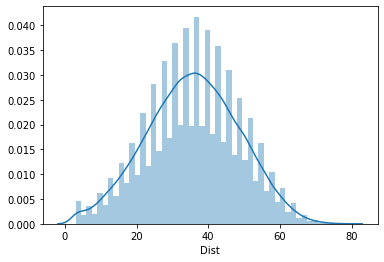

In [30]:
ax = sns.distplot(orders['Dist'])

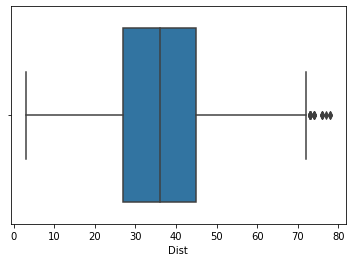

In [31]:
ax = sns.boxplot(orders['Dist'])

### NaN Values

#### Check for NaN

In [32]:
orders.isna().any()

OrderID                  False
InvoiceDate              False
CustomerID               False
OrderVolume               True
ShipMode                 False
Segment                  False
Category                 False
PaymentTerm              False
Discount                  True
ExistingPurchaseOrder    False
CashInDate               False
Market                   False
CustomerComplaints       False
Dist                     False
dtype: bool

In [33]:
orders['OrderVolume'].isnull().value_counts()

False    37633
True         9
Name: OrderVolume, dtype: int64

In [34]:
orders['Discount'].isnull().value_counts()

False    37626
True        16
Name: Discount, dtype: int64

#### Drop rows with NaN

In [35]:
orders = orders.dropna()

In [36]:
orders.isna().any()

OrderID                  False
InvoiceDate              False
CustomerID               False
OrderVolume              False
ShipMode                 False
Segment                  False
Category                 False
PaymentTerm              False
Discount                 False
ExistingPurchaseOrder    False
CashInDate               False
Market                   False
CustomerComplaints       False
Dist                     False
dtype: bool

### Outliers

#### Finding Outliers in OrderVolume

In [37]:
orders['OrderVolume'].describe()

count    37617.000000
mean       245.181780
std        479.148363
min          0.560000
25%         30.960000
50%         85.500000
75%        252.830000
max      22638.480000
Name: OrderVolume, dtype: float64

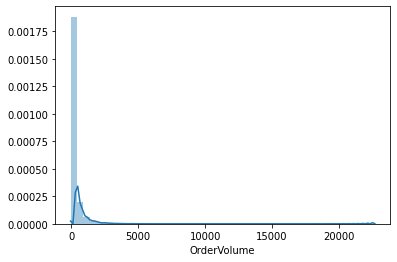

In [38]:
sns.distplot(orders['OrderVolume'])

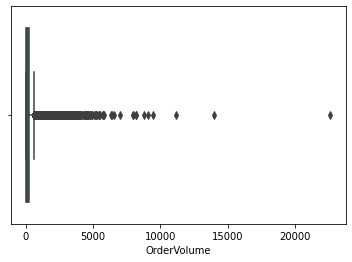

In [39]:
sns.boxplot(orders['OrderVolume'])

In [40]:
low = .01
quantile_low = orders['OrderVolume'].quantile(low)
quantile_low

3.75

In [41]:
high = .99
quantile_high = orders['OrderVolume'].quantile(high)
quantile_high

2244.383999999998

#### Remove Outliers

In [42]:
orders = orders[(orders['OrderVolume'] > quantile_low) & (orders['OrderVolume'] < quantile_high)]

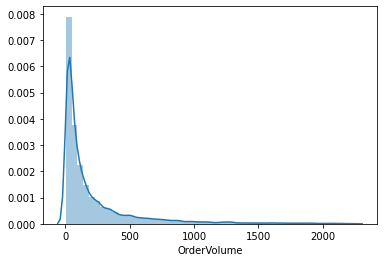

In [43]:
sns.distplot(orders['OrderVolume'])

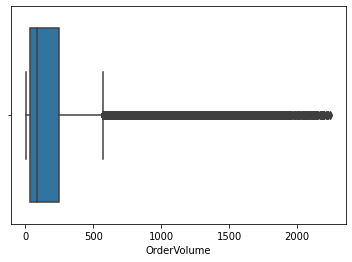

In [44]:
sns.boxplot(orders['OrderVolume'])

### Converting data to int

In [45]:
orders.head()

,OrderID,InvoiceDate,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,CashInDate,Market,CustomerComplaints,Dist
0,O-100,2011-01-03,1024,276.10,Same Day,Corporate,Office Supplies,30,5%,Yes,2011-02-18,APAC,0,46
1,O-101,2011-01-03,1024,35.88,Same Day,Corporate,Office Supplies,30,5%,Yes,2011-02-18,APAC,0,46
2,O-102,2011-01-05,1006,66.12,Second Class,Consumer,Office Supplies,30,3%,Yes,2011-02-06,EMEA,5,32
3,O-104,2011-01-06,1023,408.30,Standard Class,Consumer,Office Supplies,30,5%,No,2011-02-17,Africa,8,42
4,O-105,2011-01-06,1009,314.22,Standard Class,Consumer,Technology,45,3%,Yes,2011-02-10,Canada,3,35


In [46]:
orders.to_pickle('orders.pkl')

In [47]:
orders['OrderVolume'] = orders['OrderVolume'].round(-1)

In [48]:
orders['OrderVolume'] = orders['OrderVolume'] /10

In [49]:
orders['OrderVolume'] = orders['OrderVolume'].astype(int)

In [50]:
orders['CustomerID'] = orders['CustomerID'] - 1000

In [51]:
orders['ShipMode'].value_counts()

Standard Class    22072
Second Class       7410
First Class        5434
Same Day           1946
Name: ShipMode, dtype: int64

In [52]:
orders['ShipMode'] =  orders['ShipMode'].map({'Standard Class': 0, 'Second Class': 1, 'First Class': 2, 'Same Day': 3} ).astype(int)

In [53]:
orders['ShipMode'].value_counts()

0    22072
1     7410
2     5434
3     1946
Name: ShipMode, dtype: int64

In [54]:
orders['Segment'].value_counts()

Consumer     19035
Corporate    17827
Name: Segment, dtype: int64

In [55]:
orders['Segment'] =  orders['Segment'].map({'Consumer': 0, 'Corporate': 1} ).astype(int)

In [56]:
orders['Segment'].value_counts()

0    19035
1    17827
Name: Segment, dtype: int64

In [57]:
orders['Category'].value_counts()

Office Supplies    22461
Technology          7370
Furniture           7031
Name: Category, dtype: int64

In [58]:
orders['Category'] =  orders['Category'].map({'Office Supplies': 0, 'Technology': 1, 'Furniture': 2} ).astype(int)

In [59]:
orders['Category'].value_counts()

0    22461
1     7370
2     7031
Name: Category, dtype: int64

In [60]:
orders['PaymentTerm'].value_counts()

14    12429
30    12252
45    12181
Name: PaymentTerm, dtype: int64

In [61]:
orders['PaymentTerm'] =  orders['PaymentTerm'].map({14: 0, 30: 1, 45: 2} )

In [62]:
orders['PaymentTerm'].value_counts()

0    12429
1    12252
2    12181
Name: PaymentTerm, dtype: int64

In [63]:
orders['Discount'].value_counts()

5%    18370
0%     9248
3%     9244
Name: Discount, dtype: int64

In [64]:
orders['Discount'] =  orders['Discount'].map({'0%': 0, '3%': 1, '5%': 2} )

In [65]:
orders['Discount'].value_counts()

2    18370
0     9248
1     9244
Name: Discount, dtype: int64

In [66]:
orders['ExistingPurchaseOrder'].value_counts()

Yes    32344
No      4518
Name: ExistingPurchaseOrder, dtype: int64

In [67]:
orders['ExistingPurchaseOrder'] =  orders['ExistingPurchaseOrder'].map({'No': 0, 'Yes': 1} )

In [68]:
orders['ExistingPurchaseOrder'].value_counts()

1    32344
0     4518
Name: ExistingPurchaseOrder, dtype: int64

In [69]:
orders['Market'].value_counts()

APAC      7980
LATAM     7455
EU        7246
US        7000
EMEA      3692
Africa    3211
Canada     278
Name: Market, dtype: int64

In [70]:
orders['Market'] =  orders['Market'].map({'APAC': 0, 'LATAM': 1, 'EU': 2, 'US': 3, 'EMEA': 4, 'Africa': 5, 'Canada': 6})

In [71]:
orders['Market'].value_counts()

0    7980
1    7455
2    7246
3    7000
4    3692
5    3211
6     278
Name: Market, dtype: int64

In [72]:
orders

,OrderID,InvoiceDate,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,CashInDate,Market,CustomerComplaints,Dist
0,O-100,2011-01-03,24,28,3,1,0,1,2,1,2011-02-18,0,0,46
1,O-101,2011-01-03,24,4,3,1,0,1,2,1,2011-02-18,0,0,46
2,O-102,2011-01-05,6,7,1,0,0,1,1,1,2011-02-06,4,5,32
3,O-104,2011-01-06,23,41,0,0,0,1,2,0,2011-02-17,5,8,42
4,O-105,2011-01-06,9,31,0,0,1,2,1,1,2011-02-10,6,3,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37636,O-48947,2014-11-30,20,5,0,0,2,2,0,1,2014-12-29,2,4,29
37637,O-48951,2014-11-30,29,5,0,1,0,0,1,0,2014-12-31,0,2,31
37638,O-48953,2014-11-30,10,2,3,0,0,0,2,1,2014-12-31,1,0,31
37639,O-48960,2014-11-30,31,3,2,0,0,0,2,1,2014-12-16,3,4,16


# Feature Selection

Reference: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [73]:
orders = orders.drop(['OrderID', 'InvoiceDate', 'CashInDate'], axis=1)

In [74]:
X = orders.drop(columns=['Dist']) #independent columns
y = orders['Dist']    #target column i.e price range

In [75]:
X.head(2)

,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,Market,CustomerComplaints
0,24,28,3,1,0,1,2,1,0,0
1,24,4,3,1,0,1,2,1,0,0


In [76]:
y.head(2)

0    46
1    46
Name: Dist, dtype: int64

### Filter Method

In [77]:
orders.corr()

,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,Market,CustomerComplaints,Dist
CustomerID,1.000000,0.031683,-0.006018,0.177028,-0.005692,0.005176,0.001605,0.002964,-0.094974,0.021948,0.059208
OrderVolume,0.031683,1.000000,-0.002839,0.008301,0.355716,-0.006416,-0.006237,0.005981,-0.111392,-0.060688,-0.153345
ShipMode,-0.006018,-0.002839,1.000000,-0.005981,-0.008148,0.003310,0.001507,0.002782,0.019069,-0.001177,-0.000177
Segment,0.177028,0.008301,-0.005981,1.000000,0.001729,-0.001466,-0.008739,0.000823,0.008822,-0.113189,0.414097
Category,-0.005692,0.355716,-0.008148,0.001729,1.000000,0.001646,-0.012108,-0.006612,-0.069234,-0.031250,-0.260489
PaymentTerm,0.005176,-0.006416,0.003310,-0.001466,0.001646,1.000000,-0.003948,-0.002673,0.002003,0.002988,0.569241
Discount,0.001605,-0.006237,0.001507,-0.008739,-0.012108,-0.003948,1.000000,0.006985,-0.008076,-0.000854,-0.200853
ExistingPurchaseOrder,0.002964,0.005981,0.002782,0.000823,-0.006612,-0.002673,0.006985,1.000000,-0.010903,-0.003852,-0.178824
Market,-0.094974,-0.111392,0.019069,0.008822,-0.069234,0.002003,-0.008076,-0.010903,1.000000,0.444801,-0.113437
CustomerComplaints,0.021948,-0.060688,-0.001177,-0.113189,-0.031250,0.002988,-0.000854,-0.003852,0.444801,1.000000,-0.278087


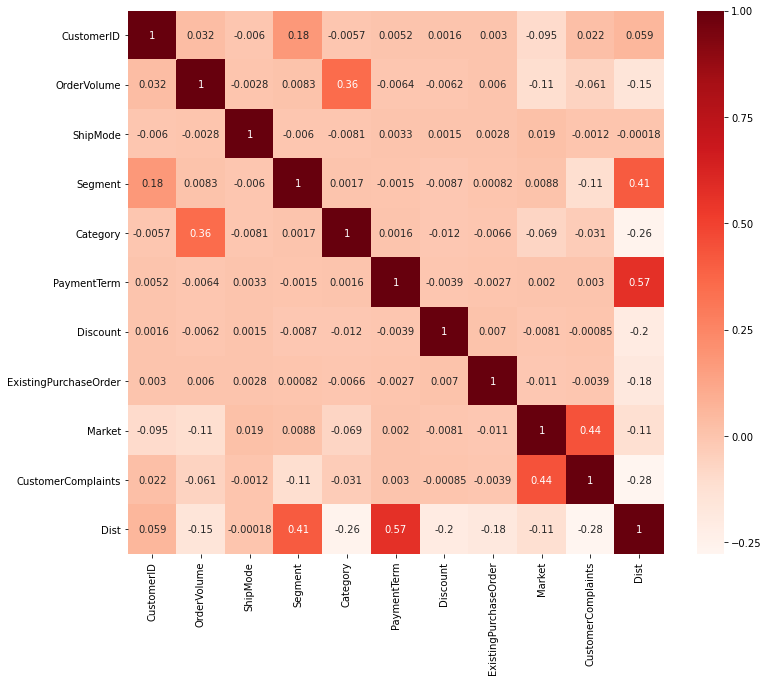

In [78]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = orders.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [79]:
#Correlation with output variable
cor_target = abs(cor["Dist"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

Segment        0.414097
PaymentTerm    0.569241
Dist           1.000000
Name: Dist, dtype: float64

#### Correlation between Segment and PaymentTerm

In [80]:
print(orders[["Segment","PaymentTerm"]].corr())

              Segment  PaymentTerm
Segment      1.000000    -0.001466
PaymentTerm -0.001466     1.000000


## Embedded Method

In [81]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.064171
Best score using built-in LassoCV: 0.702375


Text(0.5, 1.0, 'Feature importance using Lasso Model')

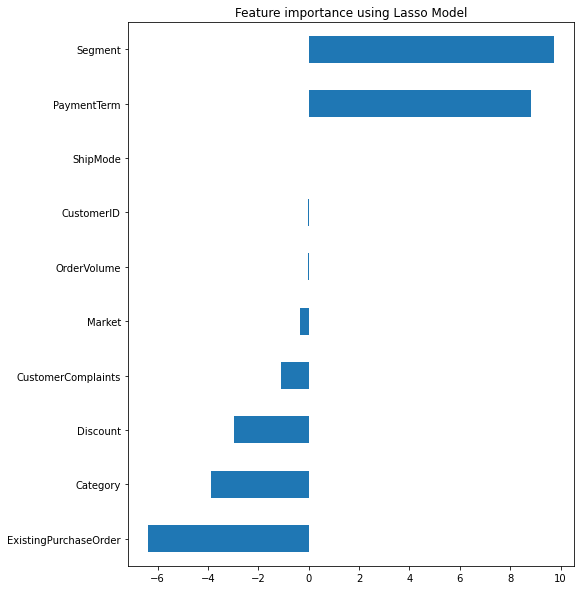

In [82]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Select Features

In [83]:
X.head()

,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,Market,CustomerComplaints
0,24,28,3,1,0,1,2,1,0,0
1,24,4,3,1,0,1,2,1,0,0
2,6,7,1,0,0,1,1,1,4,5
3,23,41,0,0,0,1,2,0,5,8
4,9,31,0,0,1,2,1,1,6,3


In [84]:
#X = X.drop(columns=['CustomerID', 'ShipMode'])
X = X.drop(columns=['ShipMode'])

# Models

In [85]:
X.shape, y.shape

((36862, 9), (36862,))

In [86]:
# Split Data in Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [87]:
X_train.shape, y_train.shape

((33175, 9), (33175,))

In [88]:
X_test.shape, y_test.shape

((3687, 9), (3687,))

## Linear Regression

In [89]:
linearRegr = LinearRegression()
linearRegr.fit(X_train, y_train) 
print(linearRegr.score(X_test, y_test))

0.7043566277060511


In [90]:
linearRegrPred = linearRegr.predict(X_test)
acc_lin = np.sqrt(mean_squared_error(y_test,linearRegrPred))
acc_lin

6.960248100647564

## Logistic Regression

In [91]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
print(logisticRegr.score(X_test, y_test))

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.05017629509085978


In [92]:
logisticRegrPred = logisticRegr.predict(X_test)
acc_log = np.sqrt(mean_squared_error(y_test,logisticRegrPred))
acc_log

7.862994872472194

## SGD

In [93]:
from sklearn.linear_model import SGDRegressor, ElasticNet
sgdrRegr = SGDRegressor()
sgdrRegr.fit(X_train, y_train)
print(sgdrRegr.score(X_test, y_test))

-3.1226267869695884e+16


In [94]:
ridgeRegr = Ridge()
ridgeRegr.fit(X_train, y_train)
print(ridgeRegr.score(X_test, y_test))

0.7043559978507414


In [95]:
ridgeRegrPred = ridgeRegr.predict(X_test)
acc_ridge = np.sqrt(mean_squared_error(y_test,ridgeRegrPred))
acc_ridge

6.960255514896113

In [96]:
lassoRegr = linear_model.Lasso()
lassoRegr.fit(X_train, y_train)
print(lassoRegr.score(X_test, y_test))

0.6143827573132093


In [97]:
elasticRegr = ElasticNet(random_state=0)
elasticRegr.fit(X_train, y_train)
print(elasticRegr.score(X_test, y_test))

0.49024891433259615


## SVM

In [98]:
svmReg = svm.SVR()
svmReg.fit(X_train, y_train)
print(svmReg.score(X_test, y_test))

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7659201037597709


In [99]:
svmRegPred = svmReg.predict(X_test)
acc_svc = np.sqrt(mean_squared_error(y_test,svmRegPred))
acc_svc

6.193308376331638

## KNN

In [100]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, y_train)
print(neigh.score(X_test, y_test))

0.7749086519855555


In [101]:
neighPred = neigh.predict(X_test)
acc_knn = np.sqrt(mean_squared_error(y_test,neighPred))
acc_knn

6.073234462585591

## DecisionTreeRegressor

In [102]:
from sklearn import tree
decTree = tree.DecisionTreeRegressor(max_depth=10)
decTree.fit(X_train, y_train)
print(decTree.score(X_test, y_test))

0.8900595253436749


In [103]:
decTreePred = decTree.predict(X_test)
acc_decision_tree = np.sqrt(mean_squared_error(y_test,decTreePred))
acc_decision_tree

4.24443073360562

## GradientBoostingRegressor

In [104]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [105]:
grad = GradientBoostingRegressor(random_state=50, n_estimators=400)
grad.fit(X_train, y_train)
print(grad.score(X_train, y_train))
print(grad.score(X_test, y_test))

0.9031089510786652
0.9017316758275311


In [106]:
gradPred = grad.predict(X_test)
acc_gradient_boost = np.sqrt(mean_squared_error(y_test,gradPred))
acc_gradient_boost

4.012799139255713

## Random Forest Regressor

In [107]:
ranForest = RandomForestRegressor(random_state=100, n_estimators=100)
ranForest.fit(X_train, y_train)
print(ranForest.score(X_test, y_test))

0.8714711385181545


In [108]:
ranForestPred = ranForest.predict(X_test)
acc_random_forest = np.sqrt(mean_squared_error(y_test,ranForestPred))
acc_random_forest

4.589242184816738

# Compare Models

In [109]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Regression', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Ridge', 
              'Decision Tree', 'Gradient Boost'],
    'Score': [acc_svc, acc_lin, acc_knn, acc_log, 
              acc_random_forest, 
              acc_ridge, acc_decision_tree, acc_gradient_boost]})
models.sort_values(by='Score', ascending=True)

,Model,Score
7,Gradient Boost,4.012799
6,Decision Tree,4.244431
4,Random Forest,4.589242
2,KNN,6.073234
0,Support Vector Machines,6.193308
1,Linear Regression,6.960248
5,Ridge,6.960256
3,Logistic Regression,7.862995


# Add PredDist & PredCashInDate

In [110]:
gradPred

array([41.86032535, 28.67107844, 32.87316904, ..., 36.17626965,
       18.00777401, 32.91095397])

In [111]:
gradPred.size

3687

In [112]:
# Get original (preprocessed) Orders-Dataframe 
ordersOrg = pd.read_pickle("orders.pkl")

In [113]:
ordersOrg

,OrderID,InvoiceDate,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,CashInDate,Market,CustomerComplaints,Dist
0,O-100,2011-01-03,1024,276.10,Same Day,Corporate,Office Supplies,30,5%,Yes,2011-02-18,APAC,0,46
1,O-101,2011-01-03,1024,35.88,Same Day,Corporate,Office Supplies,30,5%,Yes,2011-02-18,APAC,0,46
2,O-102,2011-01-05,1006,66.12,Second Class,Consumer,Office Supplies,30,3%,Yes,2011-02-06,EMEA,5,32
3,O-104,2011-01-06,1023,408.30,Standard Class,Consumer,Office Supplies,30,5%,No,2011-02-17,Africa,8,42
4,O-105,2011-01-06,1009,314.22,Standard Class,Consumer,Technology,45,3%,Yes,2011-02-10,Canada,3,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37636,O-48947,2014-11-30,1020,50.40,Standard Class,Consumer,Furniture,45,0%,Yes,2014-12-29,EU,4,29
37637,O-48951,2014-11-30,1029,50.09,Standard Class,Corporate,Office Supplies,14,3%,No,2014-12-31,APAC,2,31
37638,O-48953,2014-11-30,1010,21.12,Same Day,Consumer,Office Supplies,14,5%,Yes,2014-12-31,LATAM,0,31
37639,O-48960,2014-11-30,1031,33.57,First Class,Consumer,Office Supplies,14,5%,Yes,2014-12-16,US,4,16


In [114]:
# Check, if correct length
X_train.shape, y_train.shape

((33175, 9), (33175,))

In [115]:
33175 + 3687

36862

In [116]:
# Create new Dataframe rows matching gradPred
ordersTail = ordersOrg.tail(3687)

In [117]:
ordersTail

,OrderID,InvoiceDate,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,CashInDate,Market,CustomerComplaints,Dist
33875,O-43537,2014-09-06,1002,424.20,Standard Class,Corporate,Office Supplies,30,0%,No,2014-10-25,Canada,4,49
33876,O-43539,2014-09-06,1010,394.98,Standard Class,Consumer,Office Supplies,14,3%,Yes,2014-10-09,LATAM,0,33
33877,O-43541,2014-09-06,1003,216.14,Same Day,Corporate,Furniture,14,0%,Yes,2014-10-04,EU,0,28
33878,O-43542,2014-09-06,1030,153.83,Same Day,Corporate,Furniture,30,5%,Yes,2014-10-06,EU,3,30
33879,O-43543,2014-09-06,1031,659.90,Standard Class,Consumer,Technology,45,5%,Yes,2014-09-25,US,4,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37636,O-48947,2014-11-30,1020,50.40,Standard Class,Consumer,Furniture,45,0%,Yes,2014-12-29,EU,4,29
37637,O-48951,2014-11-30,1029,50.09,Standard Class,Corporate,Office Supplies,14,3%,No,2014-12-31,APAC,2,31
37638,O-48953,2014-11-30,1010,21.12,Same Day,Consumer,Office Supplies,14,5%,Yes,2014-12-31,LATAM,0,31
37639,O-48960,2014-11-30,1031,33.57,First Class,Consumer,Office Supplies,14,5%,Yes,2014-12-16,US,4,16


In [118]:
gradPred

array([41.86032535, 28.67107844, 32.87316904, ..., 36.17626965,
       18.00777401, 32.91095397])

In [119]:
# Add predicted values
ordersTail['PredDist'] = gradPred

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [120]:
ordersTail

,OrderID,InvoiceDate,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,CashInDate,Market,CustomerComplaints,Dist,PredDist
33875,O-43537,2014-09-06,1002,424.20,Standard Class,Corporate,Office Supplies,30,0%,No,2014-10-25,Canada,4,49,41.860325
33876,O-43539,2014-09-06,1010,394.98,Standard Class,Consumer,Office Supplies,14,3%,Yes,2014-10-09,LATAM,0,33,28.671078
33877,O-43541,2014-09-06,1003,216.14,Same Day,Corporate,Furniture,14,0%,Yes,2014-10-04,EU,0,28,32.873169
33878,O-43542,2014-09-06,1030,153.83,Same Day,Corporate,Furniture,30,5%,Yes,2014-10-06,EU,3,30,30.683715
33879,O-43543,2014-09-06,1031,659.90,Standard Class,Consumer,Technology,45,5%,Yes,2014-09-25,US,4,19,39.589232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37636,O-48947,2014-11-30,1020,50.40,Standard Class,Consumer,Furniture,45,0%,Yes,2014-12-29,EU,4,29,13.511086
37637,O-48951,2014-11-30,1029,50.09,Standard Class,Corporate,Office Supplies,14,3%,No,2014-12-31,APAC,2,31,41.187130
37638,O-48953,2014-11-30,1010,21.12,Same Day,Consumer,Office Supplies,14,5%,Yes,2014-12-31,LATAM,0,31,36.176270
37639,O-48960,2014-11-30,1031,33.57,First Class,Consumer,Office Supplies,14,5%,Yes,2014-12-16,US,4,16,18.007774


In [121]:
# Change type of PredDist to int
ordersTail['PredDist'] = ordersTail['PredDist'].astype(int)

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
ordersTail

,OrderID,InvoiceDate,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,CashInDate,Market,CustomerComplaints,Dist,PredDist
33875,O-43537,2014-09-06,1002,424.20,Standard Class,Corporate,Office Supplies,30,0%,No,2014-10-25,Canada,4,49,41
33876,O-43539,2014-09-06,1010,394.98,Standard Class,Consumer,Office Supplies,14,3%,Yes,2014-10-09,LATAM,0,33,28
33877,O-43541,2014-09-06,1003,216.14,Same Day,Corporate,Furniture,14,0%,Yes,2014-10-04,EU,0,28,32
33878,O-43542,2014-09-06,1030,153.83,Same Day,Corporate,Furniture,30,5%,Yes,2014-10-06,EU,3,30,30
33879,O-43543,2014-09-06,1031,659.90,Standard Class,Consumer,Technology,45,5%,Yes,2014-09-25,US,4,19,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37636,O-48947,2014-11-30,1020,50.40,Standard Class,Consumer,Furniture,45,0%,Yes,2014-12-29,EU,4,29,13
37637,O-48951,2014-11-30,1029,50.09,Standard Class,Corporate,Office Supplies,14,3%,No,2014-12-31,APAC,2,31,41
37638,O-48953,2014-11-30,1010,21.12,Same Day,Consumer,Office Supplies,14,5%,Yes,2014-12-31,LATAM,0,31,36
37639,O-48960,2014-11-30,1031,33.57,First Class,Consumer,Office Supplies,14,5%,Yes,2014-12-16,US,4,16,18


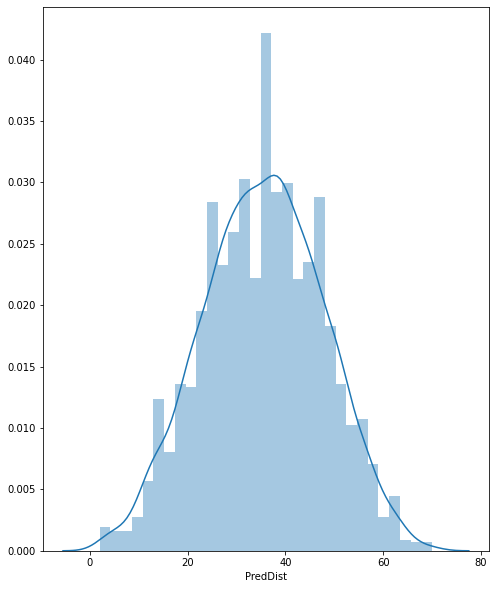

In [123]:
# Check distribution of PredDist
# Has a similar shape as distribution Dist
sns.distplot(ordersTail['PredDist'])

# Task 2: Aggregate the predictions to a total amount of expected cash in per date

In [124]:
# Add column PredCashInDate with the date resulting from InvoiceDate and PredDist

ordersTail['PredCashInDate'] = ordersTail['InvoiceDate']
for index, row in ordersTail.iterrows():
    d = ordersTail['PredDist'][index]
    ordersTail['PredCashInDate'][index] = ordersTail['InvoiceDate'][index] + np.timedelta64(d, 'D')

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Daniel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/use

In [125]:
ordersTail

,OrderID,InvoiceDate,CustomerID,OrderVolume,ShipMode,Segment,Category,PaymentTerm,Discount,ExistingPurchaseOrder,CashInDate,Market,CustomerComplaints,Dist,PredDist,PredCashInDate
33875,O-43537,2014-09-06,1002,424.20,Standard Class,Corporate,Office Supplies,30,0%,No,2014-10-25,Canada,4,49,41,2014-10-17
33876,O-43539,2014-09-06,1010,394.98,Standard Class,Consumer,Office Supplies,14,3%,Yes,2014-10-09,LATAM,0,33,28,2014-10-04
33877,O-43541,2014-09-06,1003,216.14,Same Day,Corporate,Furniture,14,0%,Yes,2014-10-04,EU,0,28,32,2014-10-08
33878,O-43542,2014-09-06,1030,153.83,Same Day,Corporate,Furniture,30,5%,Yes,2014-10-06,EU,3,30,30,2014-10-06
33879,O-43543,2014-09-06,1031,659.90,Standard Class,Consumer,Technology,45,5%,Yes,2014-09-25,US,4,19,39,2014-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37636,O-48947,2014-11-30,1020,50.40,Standard Class,Consumer,Furniture,45,0%,Yes,2014-12-29,EU,4,29,13,2014-12-13
37637,O-48951,2014-11-30,1029,50.09,Standard Class,Corporate,Office Supplies,14,3%,No,2014-12-31,APAC,2,31,41,2015-01-10
37638,O-48953,2014-11-30,1010,21.12,Same Day,Consumer,Office Supplies,14,5%,Yes,2014-12-31,LATAM,0,31,36,2015-01-05
37639,O-48960,2014-11-30,1031,33.57,First Class,Consumer,Office Supplies,14,5%,Yes,2014-12-16,US,4,16,18,2014-12-18


In [126]:
# Create new Dataframe that is grouped by PredCashInDate and sums up the values of OrderVolume
ordersFinal = ordersTail.groupby('PredCashInDate')[['OrderVolume']].sum().reset_index()
ordersFinal

,PredCashInDate,OrderVolume
0,2014-09-09,137.25
1,2014-09-11,53.14
2,2014-09-12,284.37
3,2014-09-13,63.77
4,2014-09-16,908.97
...,...,...
131,2015-01-24,126.30
132,2015-01-25,136.14
133,2015-01-26,166.54
134,2015-01-28,75.60


In [127]:
# Remove data except for December 2014
ordersFinal = ordersFinal[(ordersFinal['PredCashInDate'] >= '2014-12-01') & (ordersFinal['PredCashInDate'] <= '2014-12-31')]
ordersFinal

,PredCashInDate,OrderVolume
79,2014-12-01,11411.22
80,2014-12-02,6365.03
81,2014-12-03,11355.56
82,2014-12-04,5815.90
83,2014-12-05,7324.90
84,2014-12-06,4091.42
85,2014-12-07,5826.70
86,2014-12-08,13527.56
87,2014-12-09,9858.15
88,2014-12-10,8264.81


In [128]:
# Change column names to match task
ordersFinal = ordersFinal.rename(columns={ 'PredCashInDate': 'Date', 'OrderVolume': 'Expected Cash In'})

In [129]:
# Change type of column Date to str
ordersFinal['Date'] = ordersFinal['Date'].astype(str)

In [130]:
# Reset index
ordersFinal = ordersFinal.reset_index(drop=True)

In [131]:
ordersFinal

,Date,Expected Cash In
0,2014-12-01,11411.22
1,2014-12-02,6365.03
2,2014-12-03,11355.56
3,2014-12-04,5815.90
4,2014-12-05,7324.90
5,2014-12-06,4091.42
6,2014-12-07,5826.70
7,2014-12-08,13527.56
8,2014-12-09,9858.15
9,2014-12-10,8264.81


In [132]:
# Store dataframe in Excel File
ordersFinal.to_excel('Results.xlsx')